In [64]:
#Importing necessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr

In [65]:
## reading the data 
df = pd.read_csv('ifood_df.csv')

## Display the data 
df.head()


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [66]:
## checking dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [67]:
df.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')

In [68]:
### Chwcking Missing Values 
df.isna().sum()

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

In [69]:

# IQR (Interquartile Range) method for outlier detection
def detect_outliers_iqr(df, col):
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - (1.5 * iqr)
  upper_bound = q3 + (1.5 * iqr)
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  return outliers

# Detect outliers in 'col1'
outliers = detect_outliers_iqr(df.copy(),'Income')

# Print outliers
print("Outliers:")
print(outliers)

# Print remaining data (without outliers)
print("\nData without outliers:")
print(df[~df['Income'].isin(outliers['Income'])])


Outliers:
Empty DataFrame
Columns: [Income, Kidhome, Teenhome, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Z_CostContact, Z_Revenue, Response, Age, Customer_Days, marital_Divorced, marital_Married, marital_Single, marital_Together, marital_Widow, education_2n Cycle, education_Basic, education_Graduation, education_Master, education_PhD, MntTotal, MntRegularProds, AcceptedCmpOverall]
Index: []

[0 rows x 39 columns]

Data without outliers:
       Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0     58138.0        0         0       58       635         88   
1     46344.0        1         1       38        11          1   
2     71613.0        0         0       26       426         49   
3     26646.0        1         0       26        11          4   


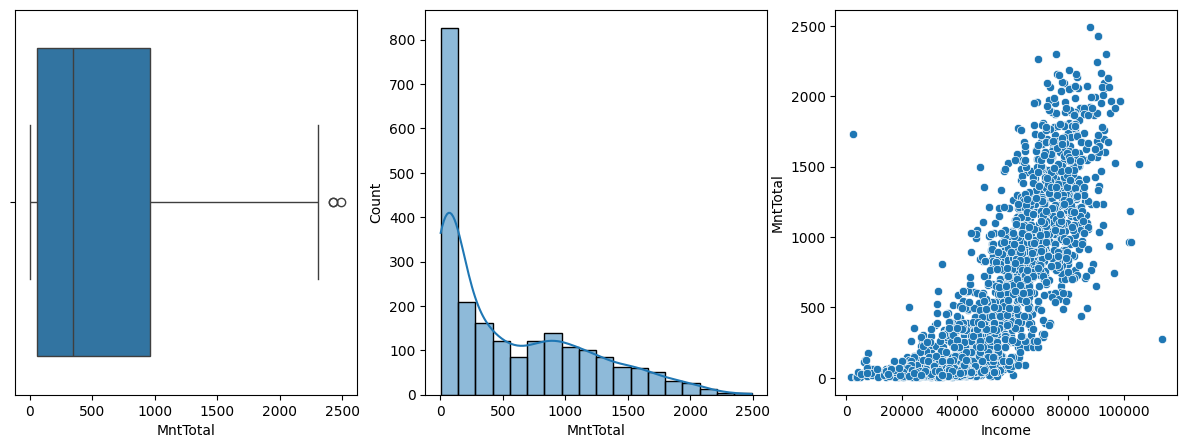

In [70]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.boxplot(x='MntTotal', data=df, ax=axes[0])
sns.histplot(data=df, x='MntTotal', kde=True, ax=axes[1])
# Assuming you have another column 'col2'
sns.scatterplot(x='Income', y='MntTotal', data=df, ax=axes[2])

plt.show()


In [71]:
### Checking Outliers 
Q1 = df['MntTotal'].quantile(0.25)
Q3 = df['MntTotal'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['MntTotal'] < lower_bound) | (df['MntTotal'] > upper_bound)]
outliers.head()




,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
1159,90638.0,0,0,29,1156,120,915,94,144,96,...,0,0,0,0,0,1,0,2429,2333,1
1467,87679.0,0,0,62,1259,172,815,97,148,33,...,1,0,0,0,1,0,0,2491,2458,3
1547,90638.0,0,0,29,1156,120,915,94,144,96,...,0,0,0,0,0,1,0,2429,2333,1


In [72]:
### Outliers removal 
def remove_outliers_iqr(df, column):
  q1, q3 = df['MntTotal'].quantile([0.25, 0.75])
  iqr = q3 - q1
  lower_bound = q1 - (1.5 * iqr)
  upper_bound = q3 + (1.5 * iqr)
  df_outlier_free = df[(df['MntTotal'] >= lower_bound) & (df['MntTotal'] <= upper_bound)]
  return df_outlier_free

df_cleaned = remove_outliers_iqr(df, 'MntTotal')
df_cleaned



,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,61223.0,0,1,46,709,43,182,42,118,247,...,0,0,0,0,1,0,0,1094,847,0
2201,64014.0,2,1,56,406,0,30,0,0,8,...,1,0,0,0,0,0,1,436,428,1
2202,56981.0,0,0,91,908,48,217,32,12,24,...,0,0,0,0,1,0,0,1217,1193,1
2203,69245.0,0,1,8,428,30,214,80,30,61,...,1,0,0,0,0,1,0,782,721,0


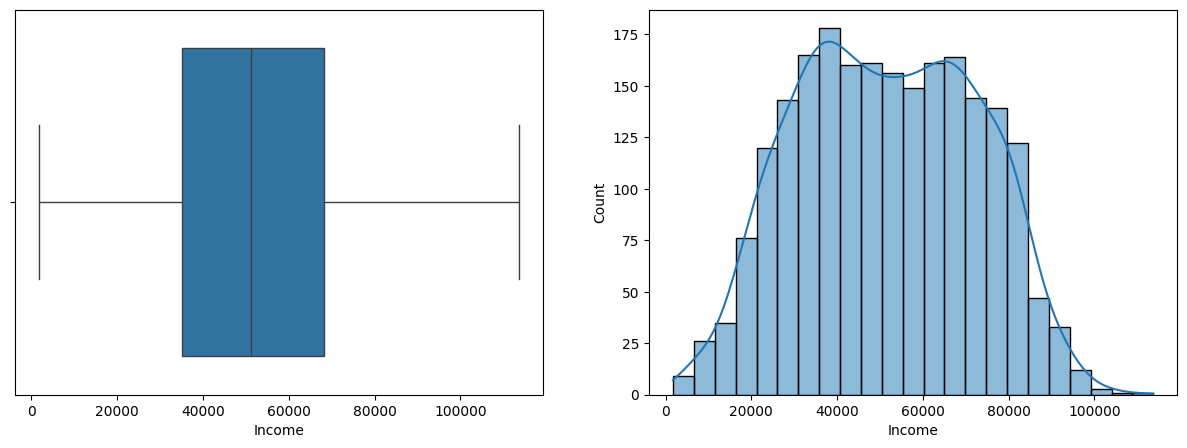

In [73]:
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Income'] < lower_bound) | (df['Income'] > upper_bound)]
outliers.head()


fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.boxplot(x='Income', data=df, ax=axes[0])
sns.histplot(data=df, x='Income', kde=True, ax=axes[1])


plt.show()

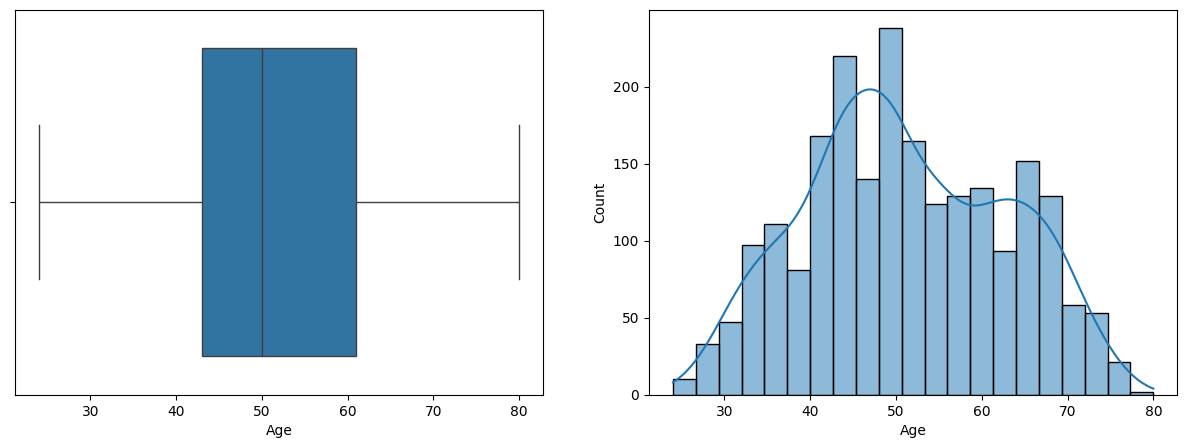

In [74]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]
outliers.head()


fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.boxplot(x='Age', data=df, ax=axes[0])
sns.histplot(data=df, x='Age', kde=True, ax=axes[1])


plt.show()

In [75]:
### As there are large set of columns so we need to group them and finding a correlation 
cols_demographics = ['Income','Age']
cols_children = ['Kidhome', 'Teenhome']
cols_marital = ['marital_Divorced', 'marital_Married','marital_Single', 'marital_Together', 'marital_Widow']
cols_mnt = ['MntTotal', 'MntRegularProds','MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
cols_communication = ['Complain', 'Response', 'Customer_Days']
cols_campaigns = ['AcceptedCmpOverall', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
cols_source_of_purchase = ['NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
cols_education = ['education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD']

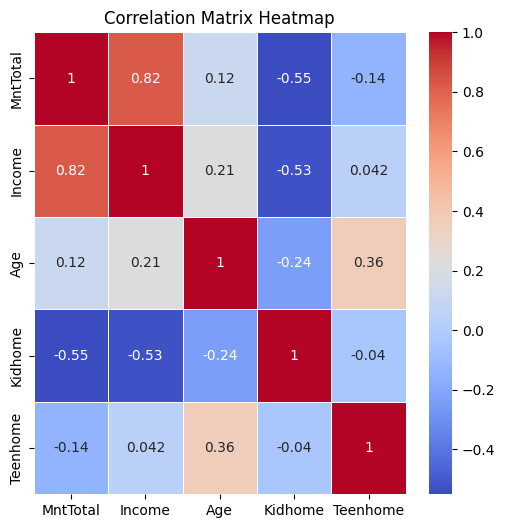

In [76]:
## hecking the Cprrelation matrix
corr_matrix = df[['MntTotal']+cols_demographics+cols_children].corr()
plt.figure(figsize=(6,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

## Analyzing map 
### Strong Positive Correlations
### MntTotal and Income: The correlation coefficient is 0.82, which indicates a strong positive relationship. As Income increases, MntTotal also tends to increase significantly.
### Teenhome and Age: The correlation coefficient is 0.36, showing a moderate positive relationship. As Age increases, the number of Teenhome (teenagers at home) tends to increase, but not very strongly.
### Strong Negative Correlations
### MntTotal and Kidhome: The correlation coefficient is -0.55, indicating a strong negative relationship. As the number of Kidhome (kids at home) increases, the MntTotal tends to decrease significantly.
### Income and Kidhome: The correlation coefficient is -0.53, showing a strong negative relationship. Higher Income tends to correlate with fewer Kidhome. 

In [77]:
### Point Biserial :
## Point-Biserial Correlation Point-Biserial Correlation is used to measure the strength and direction of the linear relationship between a binary variable and a continuous variable.
for col in cols_marital:
    correlation, p_value = pointbiserialr(df[col], df['MntTotal'])
    print(f'{correlation:.4f}: Point-Biserial Correlation for {col} with p-value {p_value:.4f}')

0.0037: Point-Biserial Correlation for marital_Divorced with p-value 0.8612
-0.0223: Point-Biserial Correlation for marital_Married with p-value 0.2963
0.0059: Point-Biserial Correlation for marital_Single with p-value 0.7804
0.0016: Point-Biserial Correlation for marital_Together with p-value 0.9393
0.0359: Point-Biserial Correlation for marital_Widow with p-value 0.0921


In [78]:
for col in cols_education:
    correlation, p_value = pointbiserialr(df[col], df['MntTotal'])
    print(f'{correlation:.4f}: Point-Biserial Correlation for {col} with p-value {p_value:.4f}')

-0.0603: Point-Biserial Correlation for education_2n Cycle with p-value 0.0046
-0.1386: Point-Biserial Correlation for education_Basic with p-value 0.0000
0.0143: Point-Biserial Correlation for education_Graduation with p-value 0.5012
0.0064: Point-Biserial Correlation for education_Master with p-value 0.7653
0.0708: Point-Biserial Correlation for education_PhD with p-value 0.0009


### New Features for better clustering e.g Marital, in_relationship 

Text(0, 0.5, 'MntTotal')

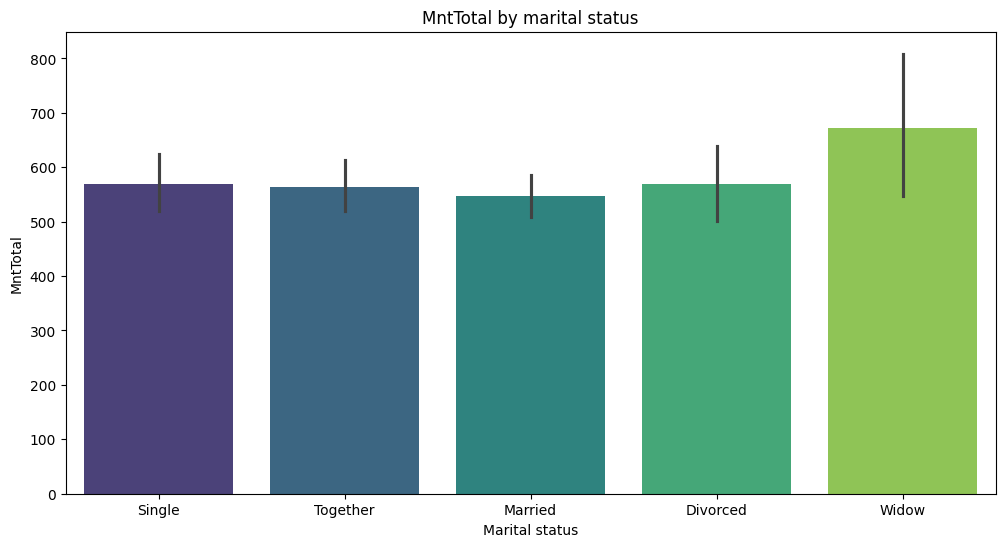

In [79]:
def get_marital_status(row):
    if row['marital_Divorced'] == 1:
        return 'Divorced'
    elif row['marital_Married'] == 1:
        return 'Married'
    elif row['marital_Single'] == 1:
        return 'Single'
    elif row['marital_Together'] == 1:
        return 'Together'
    elif row['marital_Widow'] == 1:
        return 'Widow'
    else:
        return 'Unknown'
df['Marital'] = df.apply(get_marital_status, axis=1)

plt.figure(figsize=(12, 6))
sns.barplot(x='Marital', y='MntTotal', data=df, palette='viridis')
plt.title('MntTotal by marital status')
plt.xlabel('Marital status')
plt.ylabel('MntTotal')

In [80]:
### New Fetaure In_Relationship By taking parameters from married, together and 0 for all other cases

def get_relationship(row):
    if row['marital_Married'] ==1:
        return 1
    elif row['marital_Together'] == 1:
        return 1
    else:
        return 0
df['In_relationship'] = df.apply(get_relationship, axis=1)
df.head()    

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Marital,In_relationship
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,1,0,0,1529,1441,0,Single,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,1,0,0,21,15,0,Single,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,0,1,0,0,734,692,0,Together,1
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,0,1,0,0,48,43,0,Together,1
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,1,407,392,0,Married,1


### Clustreing Data Using K-Mean 

In [81]:
from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols_for_clustering = ['Income', 'MntTotal', 'In_relationship']
data_scaled = df.copy()
data_scaled[cols_for_clustering] = scaler.fit_transform(df[cols_for_clustering])
data_scaled[cols_for_clustering].describe()

,Income,MntTotal,In_relationship
count,2.205000e+03,2.205000e+03,2.205000e+03
mean,2.255691e-17,-3.705778e-17,6.444832e-17
std,1.000227e+00,1.000227e+00,1.000227e+00
min,-2.409272e+00,-9.704038e-01,-1.347625e+00
25%,-7.932106e-01,-8.800957e-01,-1.347625e+00
50%,-1.618161e-02,-3.816642e-01,7.420464e-01
75%,8.044529e-01,6.968235e-01,7.420464e-01
max,2.999363e+00,3.348757e+00,7.420464e-01


In [82]:
### PCA: Principal Component Analysis (PCA) is a technique used for dimensionality reduction in data analysis.
# It helps simplify complex datasets by transforming them into a new set of variables called principal components. 

from sklearn import decomposition
pca = decomposition.PCA(n_components = 2)
pca_res = pca.fit_transform(data_scaled[cols_for_clustering])
data_scaled['pc1'] = pca_res[:,0]
data_scaled['pc2'] = pca_res[:,1]

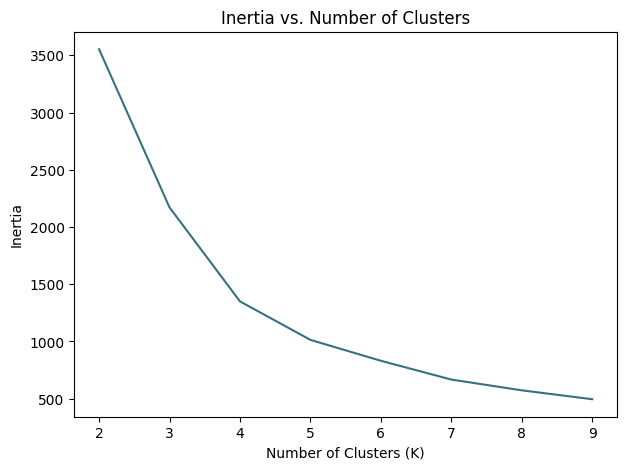

In [83]:
## Elbow Method: he Elbow Method is a technique used to determine the optimal number of clusters  in a dataset. It works by plotting the elbow of the curve that represents the sum of squared

X = data_scaled[cols_for_clustering]
inertia_list = []
for K in range(2,10):
    inertia = KMeans(n_clusters=K, random_state=7).fit(X).inertia_
    inertia_list.append(inertia)
    
    
plt.figure(figsize=[7,5])
plt.plot(range(2,10), inertia_list, color=(54 / 255, 113 / 255, 130 / 255))
plt.title("Inertia vs. Number of Clusters")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.show()


### From above grapgh it is shown that cluster 0f 4-5 are optimal for dataset 

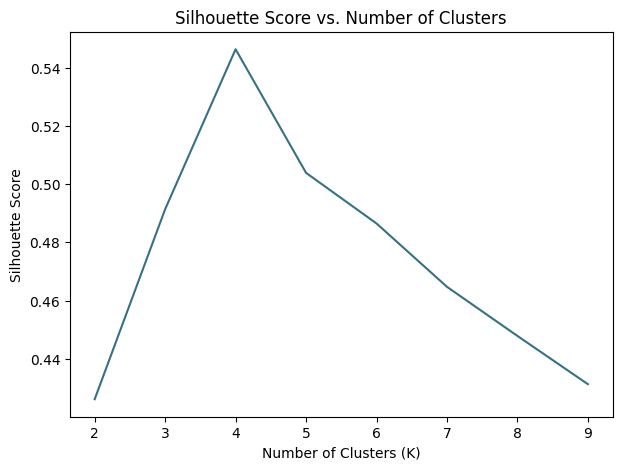

In [84]:
## Lets try Silhouette score analysis: 
### Silhouette score analysis
### Silhouette score is a metric that used to assess the quality of clustering. 
# A higher silhouette score indicates that the clusters are well-separated, 
# while a lower score suggests that the clusters may overlap or are poorly defined.


from sklearn.metrics import silhouette_score
silhouette_list = []
for K in range(2,10):
    model = KMeans(n_clusters = K, random_state=7)
    clusters = model.fit_predict(X)
    s_avg = silhouette_score(X, clusters)
    silhouette_list.append(s_avg)

plt.figure(figsize=[7,5])
plt.plot(range(2,10), silhouette_list, color=(54 / 255, 113 / 255, 130 / 255))
plt.title("Silhouette Score vs. Number of Clusters")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.show()


### As clusters have high scor at 4 Hence 4 cluster will be chosoen for K_Mean Clustering 

In [85]:
model = KMeans(n_clusters=4, random_state = 7)
model.fit(data_scaled[cols_for_clustering])
data_scaled['Cluster'] = model.predict(data_scaled[cols_for_clustering])

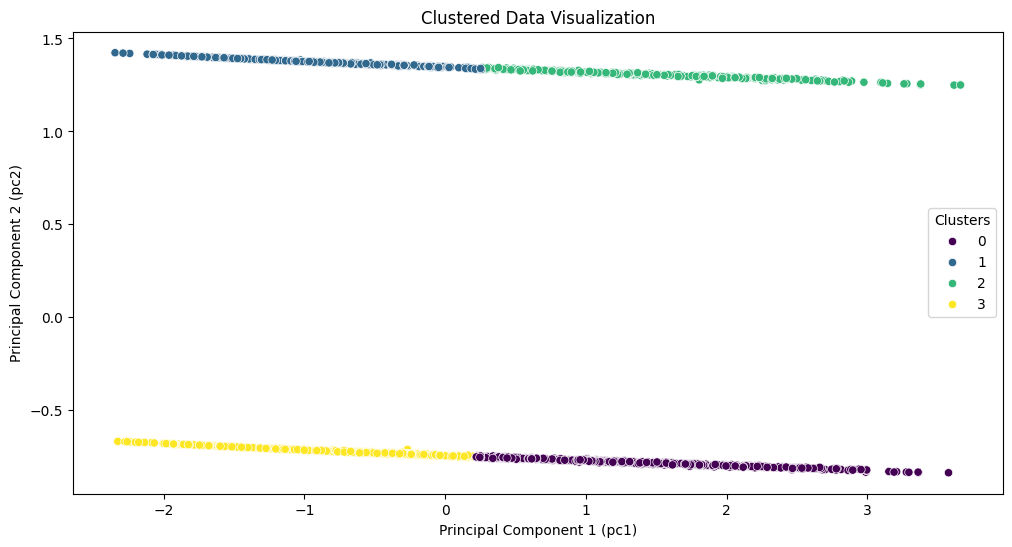

In [86]:
## Cluster Visualization

plt.figure(figsize=(12, 6))
sns.scatterplot(x='pc1', y='pc2', data=data_scaled, hue='Cluster', palette='viridis')
plt.title('Clustered Data Visualization')
plt.xlabel('Principal Component 1 (pc1)')
plt.ylabel('Principal Component 2 (pc2)')
plt.legend(title='Clusters')



In [87]:
df['Cluster'] = data_scaled.Cluster
df.groupby('Cluster')[cols_for_clustering].mean()

,Income,MntTotal,In_relationship
Cluster,,,
0,71846.901235,1149.742504,1.0
1,37332.339956,150.761589,0.0
2,72059.439394,1167.306061,0.0
3,37892.819883,158.463158,1.0


In [88]:
mnt_data = df.groupby('Cluster')[cols_mnt].mean().reset_index()
mnt_data.head()

,Cluster,MntTotal,MntRegularProds,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,0,1149.742504,1078.716049,624.382716,52.700176,342.162257,75.615520,54.881834,71.026455
1,1,150.761589,125.662252,85.450331,7.832230,38.774834,10.971302,7.732892,25.099338
2,2,1167.306061,1092.893939,617.148485,55.324242,361.278788,77.703030,55.851515,74.412121
3,3,158.463158,133.962573,92.046784,7.640936,39.438596,11.423392,7.913450,24.500585


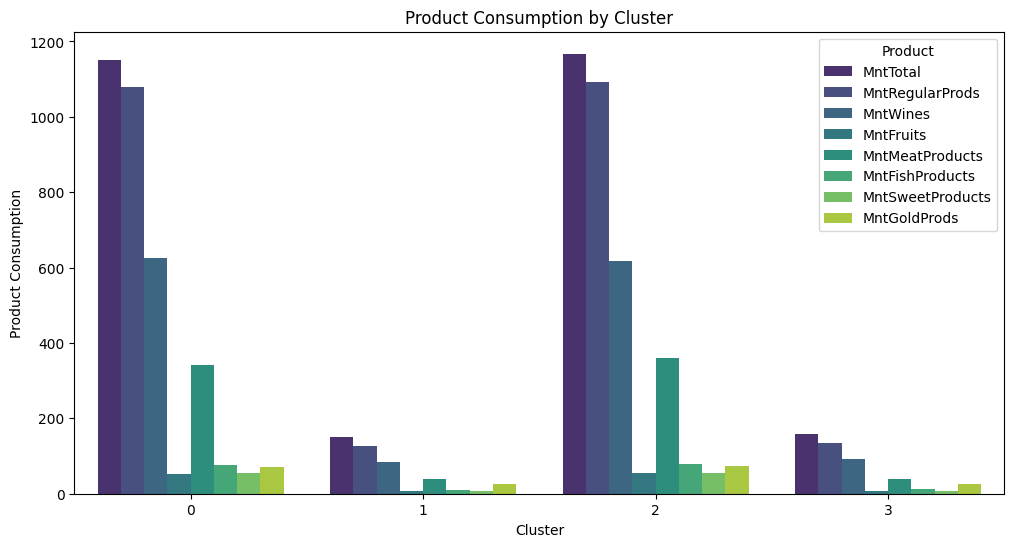

In [89]:
melted_data = pd.melt(mnt_data, id_vars="Cluster", var_name="Product", value_name="Consumption")
plt.figure(figsize=(12, 6))
sns.barplot(x="Cluster", y="Consumption", hue="Product", data=melted_data, ci=None, palette="viridis")
plt.title("Product Consumption by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Product Consumption")
plt.xticks(rotation=0)  
plt.legend(title="Product", loc="upper right")

plt.show()

Text(0, 0.5, 'MntTotal')

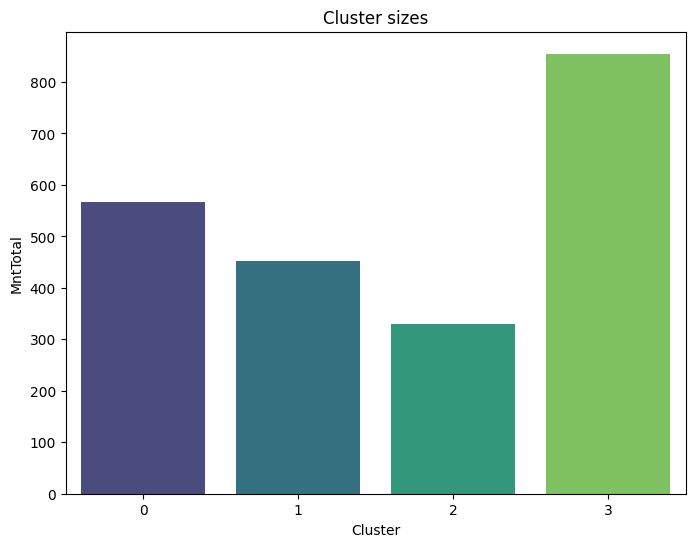

In [90]:
cluster_sizes = df.groupby('Cluster')[['MntTotal']].count().reset_index()
plt.figure(figsize=(8,6))
sns.barplot(x='Cluster', y='MntTotal', data=cluster_sizes, palette = 'viridis')
plt.title('Cluster sizes')
plt.xlabel('Cluster')
plt.ylabel('MntTotal')

In [91]:
total_rows = len(df)
cluster_sizes['Share%'] = round(cluster_sizes['MntTotal'] / total_rows*100,0)
cluster_sizes.head()

,Cluster,MntTotal,Share%
0,0,567,26.0
1,1,453,21.0
2,2,330,15.0
3,3,855,39.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


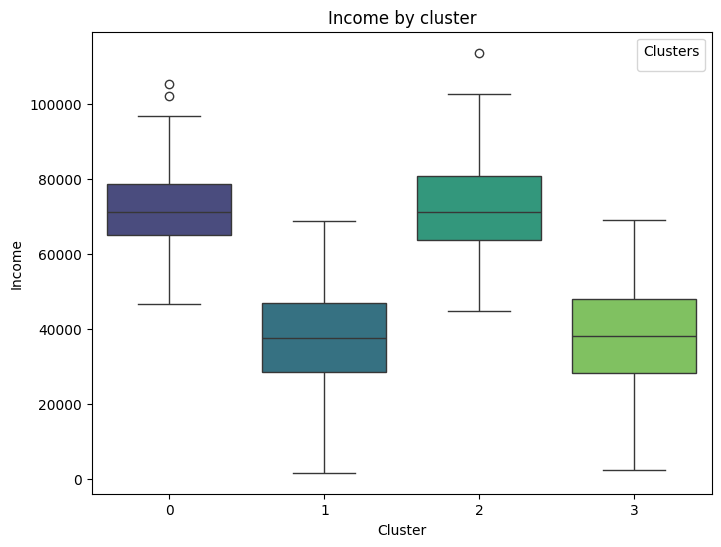

In [92]:
## Income w.r.t Cluster 
plt.figure(figsize=(8, 6))
sns.boxplot(x='Cluster', y='Income', data=df, palette='viridis')
plt.title('Income by cluster')
plt.xlabel('Cluster')
plt.ylabel('Income')
plt.legend(title='Clusters')

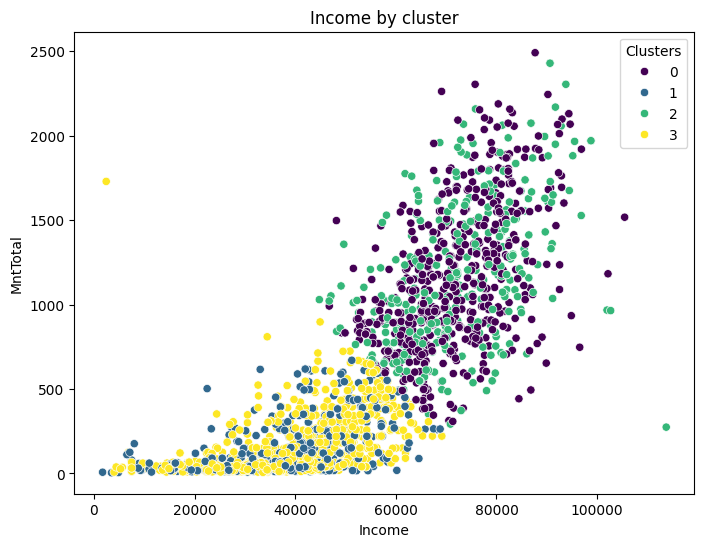

In [93]:
## Scatter Plot 
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Income', y='MntTotal', data=df, hue = 'Cluster', palette='viridis')
plt.title('Income by cluster')
plt.xlabel('Income')
plt.ylabel('MntTotal')
plt.legend(title='Clusters')

Text(0, 0.5, 'In_relationship')

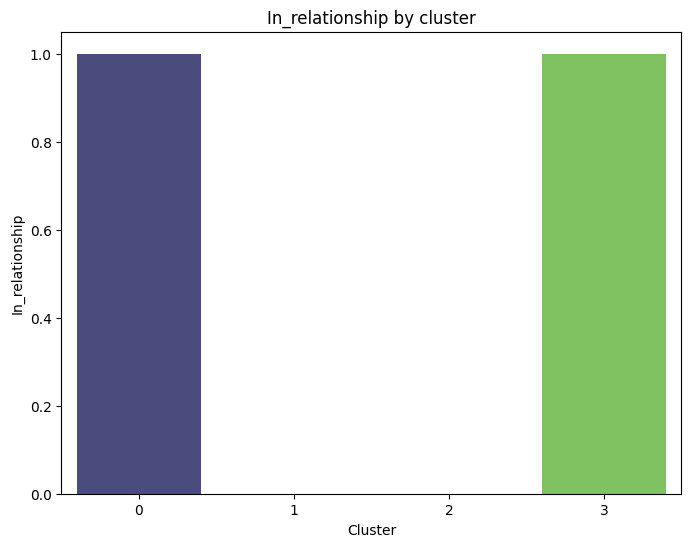

In [94]:
### In_Relationship w.r.t Cluster

plt.figure(figsize=(8, 6))
sns.barplot(x='Cluster', y='In_relationship', data=df, palette='viridis')
plt.title('In_relationship by cluster')
plt.xlabel('Cluster')
plt.ylabel('In_relationship')